In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
transactions = pd.read_csv("E:/NJIT/NJIT subject books/SQL Aish Assignemnt/TRANSACTION_TAKEHOME.csv")
users = pd.read_csv("E:/NJIT/NJIT subject books/SQL Aish Assignemnt/USER_TAKEHOME.csv")
products = pd.read_csv("E:/NJIT/NJIT subject books/SQL Aish Assignemnt/PRODUCTS_TAKEHOME.csv")

In [3]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [4]:
users.head()   

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [5]:
products.head() 

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [6]:
# Convert birthdate to datetime format
users["BIRTH_DATE"] = pd.to_datetime(users["BIRTH_DATE"], errors="coerce")
print(users["BIRTH_DATE"])

0       2000-08-11 00:00:00+00:00
1       2001-09-24 04:00:00+00:00
2       1994-10-28 00:00:00+00:00
3                             NaT
4       1972-03-19 00:00:00+00:00
                   ...           
99995   1992-03-16 08:00:00+00:00
99996   1993-09-23 05:00:00+00:00
99997   1983-04-19 00:00:00+00:00
99998   1995-06-09 04:00:00+00:00
99999   1995-12-15 05:00:00+00:00
Name: BIRTH_DATE, Length: 100000, dtype: datetime64[ns, UTC]


In [7]:
#  Calculate user age
users["AGE"] = pd.to_datetime("today").year - users["BIRTH_DATE"].dt.year

# Merge datasets
merged = transactions.merge(users, left_on="USER_ID", right_on="ID", how="inner")
merged = merged.merge(products, on="BARCODE", how="inner")

# Top 5 Brands by Sales for Users 21+ 

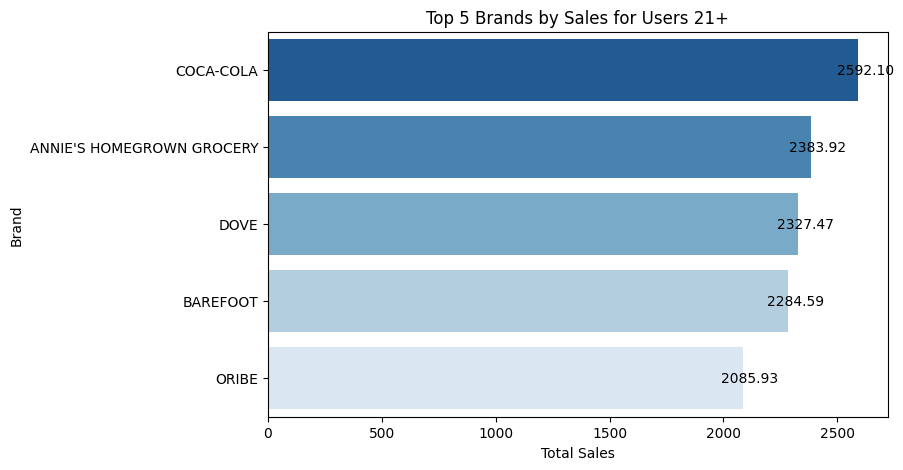

In [ ]:
# Convert 'FINAL_SALE' to numeric
merged["FINAL_SALE"] = pd.to_numeric(merged["FINAL_SALE"], errors="coerce")
top_brands_21 = merged[merged["AGE"] >= 21].groupby("BRAND")["FINAL_SALE"].sum().nlargest(5).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='FINAL_SALE', y='BRAND', data=top_brands_21, palette="Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Brand")
plt.title("Top 5 Brands by Sales for Users 21+")

# Annotating the bars with the values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

# Top 10 Brands in Dips & Salsa

In [9]:
# Merge transactions and products DataFrames
merged = transactions.merge(products, on="BARCODE", how="inner")

             BRAND  FINAL_SALE
69        TOSTITOS   103354.84
22          FRITOS    82566.81
18  FRESH CRAVINGS    82514.05
56     OLD EL PASO    82475.08
25      GOOD FOODS    61975.20
30          HERDEZ    61904.63
42       LITEHOUSE    61894.23
73          WHOLLY    61884.38
5      BOAR'S HEAD    61875.27
49         MISSION    61862.87


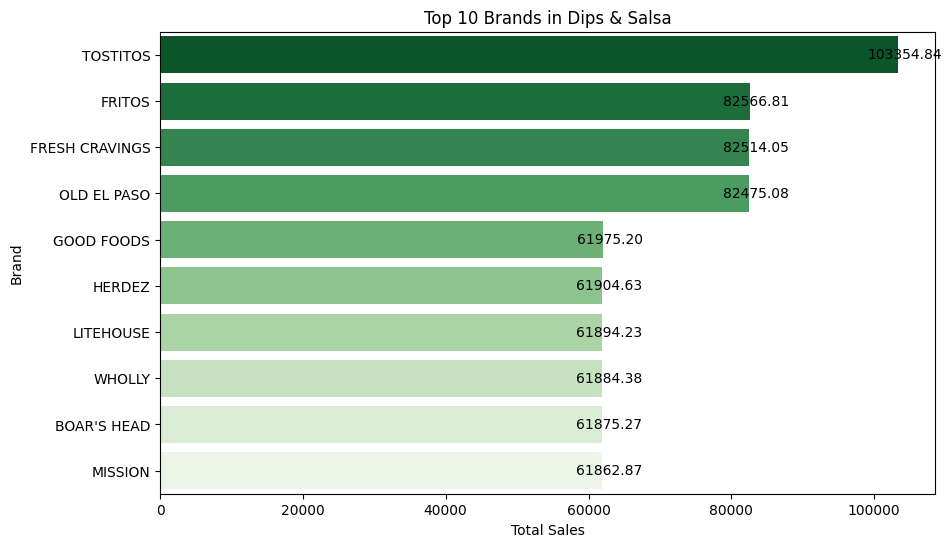

The leading brand in the Dips & Salsa category is TOSTITOS with total sales of 103354.84.


In [ ]:
# # Merge transactions and products DataFrames
# merged = transactions.merge(products, on="BARCODE", how="inner")

# Convert 'FINAL_SALE' to numeric
merged["FINAL_SALE"] = pd.to_numeric(merged["FINAL_SALE"], errors="coerce")

# Filter the data for the "Dips & Salsa" category
dips_sales = merged[merged["CATEGORY_2"] == "Dips & Salsa"]

# Group by brand and calculate total sales
dips_sales = dips_sales.groupby("BRAND")["FINAL_SALE"].sum().reset_index()

# Sort by total sales in descending order and get the top 10 brands
dips_sales = dips_sales.sort_values(by="FINAL_SALE", ascending=False).head(10)

# Display the top 10 brands by sales
print(dips_sales)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='FINAL_SALE', y='BRAND', data=dips_sales, palette="Greens_r")
plt.xlabel("Total Sales")
plt.ylabel("Brand")
plt.title("Top 10 Brands in Dips & Salsa")
plt.xticks(rotation=0)

# Annotating the bars with the values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

# Find the leading brand in the "Dips & Salsa" category
leading_brand = dips_sales.iloc[0]
print(f"The leading brands in the Dips & Salsa category are {leading_brand['BRAND']} with total sales of {leading_brand['FINAL_SALE']:.2f}.")

# Top 5 Brands by Sales for Users with Accounts for at Least 6 Months

                         BRAND  FINAL_SALE
164                  COCA-COLA     2592.10
37   ANNIE'S HOMEGROWN GROCERY     2383.92
204                       DOVE     2327.47
69                    BAREFOOT     2284.59
535                      ORIBE     2085.93


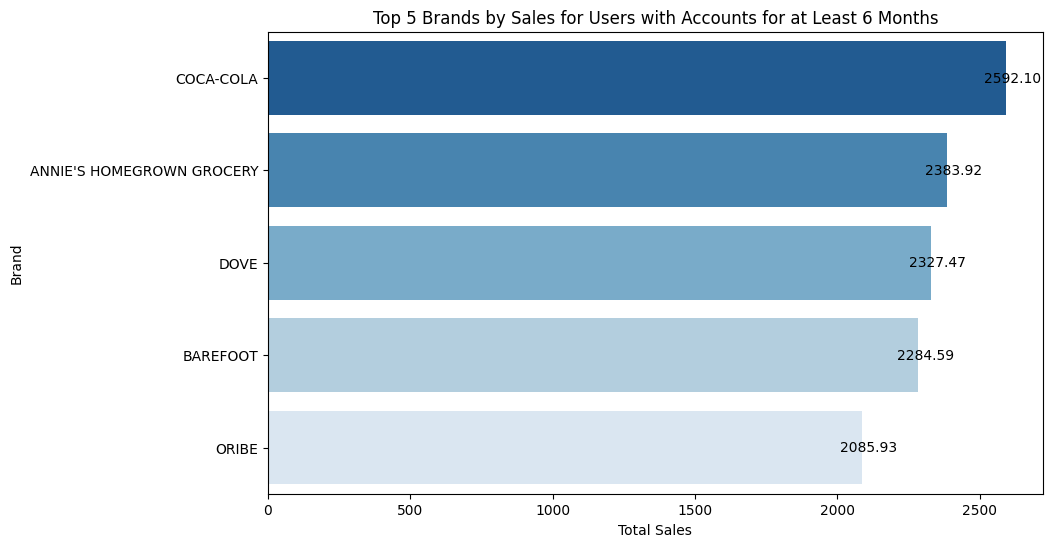

In [13]:
# Convert 'CREATED_DATE' to datetime and remove timezone information
users["CREATED_DATE"] = pd.to_datetime(users["CREATED_DATE"], errors="coerce").dt.tz_localize(None)

# Filter users with accounts for at least 6 months
active_users = users[users["CREATED_DATE"] <= pd.Timestamp.now().tz_localize(None) - pd.DateOffset(months=6)]

# Merge active users with transactions
merged = transactions.merge(active_users, left_on="USER_ID", right_on="ID", how="inner")

# Merge the result with products
merged = merged.merge(products, on="BARCODE", how="inner")

# Convert 'FINAL_SALE' to numeric
merged["FINAL_SALE"] = pd.to_numeric(merged["FINAL_SALE"], errors="coerce")

# Group by brand and calculate total sales
top_5_brands = merged.groupby("BRAND")["FINAL_SALE"].sum().reset_index()

# Sort by total sales in descending order and get the top 5 brands
top_5_brands = top_5_brands.sort_values(by="FINAL_SALE", ascending=False).head(5)

# Display the top 5 brands by sales
print(top_5_brands)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='FINAL_SALE', y='BRAND', data=top_5_brands, palette="Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Brand")
plt.title("Top 5 Brands by Sales for Users with Accounts for at Least 6 Months")
plt.xticks(rotation=0)

# Annotating the bars with the values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()